In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
import torch.nn.functional as F
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from torchvision import datasets,transforms

In [2]:
if torch.cuda.is_available():
    device='cuda'
elif torch.backends.mps.is_available():
    device=torch.device("mps")
else:
    device='cpu'
print(f"Using device = {device}")

Using device = mps


In [3]:
train_dir="CustomDataSet/data/train"
test_dir="CustomDataset/data/test"

In [4]:
#Set up transforms
train_transforms= transforms.Compose([
    transforms.Resize((128,128)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(degrees=20),
    transforms.RandomGrayscale(p=0.1),
    transforms.GaussianBlur(kernel_size=3),
    transforms.ToTensor(),
    transforms.Normalize((0.5,),(0.5,))
])
test_transforms= transforms.Compose([
    transforms.Resize((128,128)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,),(0.5,))
])

In [5]:
# Load Datasets
train_data= datasets.ImageFolder(root=train_dir, transform= train_transforms)
test_data = datasets.ImageFolder(root=test_dir, transform= test_transforms)

In [6]:
# create data loader
batch_size=32
train_loader=DataLoader(train_data,batch_size=batch_size,shuffle=True)
test_loader=DataLoader(test_data,batch_size=batch_size,shuffle=False)

In [7]:
class_name_idx=train_data.class_to_idx
print(class_name_idx)

{'donuts': 0, 'french_fries': 1, 'fried_rice': 2, 'samosa': 3}


In [8]:
from model import CustomCNN
num_classes=len(train_data.classes)
model_0=CustomCNN(num_classes=num_classes).to(device)

In [9]:
# define loss function
criterion=nn.CrossEntropyLoss()
# define optimizer
optimizer=torch.optim.Adam(params=model_0.parameters(),lr=0.001,weight_decay=1e-4)

In [10]:
from trainNN import train
torch.manual_seed(42)
from timeit import default_timer as timer
start_time=timer()
results=train(
    model=model_0,
    train_dataloader=train_loader,
    test_dataloader=test_loader,
    optimizer=optimizer,
    loss_fn=criterion,
    epochs=20,
    device=device
    
)
end_time=timer()
print(f" total trainning time is {end_time-start_time} seconds")

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
  5%|▌         | 1/20 [00:09<02:56,  9.28s/it]

Epoch: 1 | train_loss: 1.3655 | train_acc: 0.3165 | test_loss: 1.3098 | test_acc: 0.3569


 10%|█         | 2/20 [00:18<02:46,  9.23s/it]

Epoch: 2 | train_loss: 1.2865 | train_acc: 0.3884 | test_loss: 1.2610 | test_acc: 0.4424


 15%|█▌        | 3/20 [00:27<02:38,  9.30s/it]

Epoch: 3 | train_loss: 1.2711 | train_acc: 0.3847 | test_loss: 1.2358 | test_acc: 0.4539


 20%|██        | 4/20 [00:36<02:26,  9.16s/it]

Epoch: 4 | train_loss: 1.2178 | train_acc: 0.4565 | test_loss: 1.1914 | test_acc: 0.4605


 25%|██▌       | 5/20 [00:45<02:14,  8.98s/it]

Epoch: 5 | train_loss: 1.1964 | train_acc: 0.4659 | test_loss: 1.1368 | test_acc: 0.5181


 30%|███       | 6/20 [00:54<02:05,  8.97s/it]

Epoch: 6 | train_loss: 1.1781 | train_acc: 0.4661 | test_loss: 1.1257 | test_acc: 0.5082


 35%|███▌      | 7/20 [01:03<01:57,  9.02s/it]

Epoch: 7 | train_loss: 1.1400 | train_acc: 0.5008 | test_loss: 1.1069 | test_acc: 0.5329


 40%|████      | 8/20 [01:13<01:53,  9.45s/it]

Epoch: 8 | train_loss: 1.1248 | train_acc: 0.5115 | test_loss: 1.1147 | test_acc: 0.5510


 45%|████▌     | 9/20 [01:24<01:46,  9.66s/it]

Epoch: 9 | train_loss: 1.0755 | train_acc: 0.5395 | test_loss: 1.0711 | test_acc: 0.5806


 50%|█████     | 10/20 [01:34<01:39,  9.95s/it]

Epoch: 10 | train_loss: 1.0231 | train_acc: 0.5724 | test_loss: 1.0938 | test_acc: 0.5740


 55%|█████▌    | 11/20 [01:44<01:28,  9.81s/it]

Epoch: 11 | train_loss: 1.0063 | train_acc: 0.5725 | test_loss: 0.9384 | test_acc: 0.6316


 60%|██████    | 12/20 [01:54<01:19,  9.92s/it]

Epoch: 12 | train_loss: 0.9256 | train_acc: 0.6237 | test_loss: 0.9314 | test_acc: 0.6266


 65%|██████▌   | 13/20 [02:04<01:09,  9.89s/it]

Epoch: 13 | train_loss: 0.8904 | train_acc: 0.6478 | test_loss: 0.8928 | test_acc: 0.6480


 70%|███████   | 14/20 [02:15<01:01, 10.23s/it]

Epoch: 14 | train_loss: 0.8892 | train_acc: 0.6245 | test_loss: 0.8464 | test_acc: 0.6859


 75%|███████▌  | 15/20 [02:26<00:52, 10.43s/it]

Epoch: 15 | train_loss: 0.7901 | train_acc: 0.6786 | test_loss: 0.9622 | test_acc: 0.6480


 80%|████████  | 16/20 [02:36<00:41, 10.43s/it]

Epoch: 16 | train_loss: 0.7491 | train_acc: 0.7019 | test_loss: 0.8806 | test_acc: 0.6760


 85%|████████▌ | 17/20 [02:46<00:31, 10.40s/it]

Epoch: 17 | train_loss: 0.7092 | train_acc: 0.7222 | test_loss: 0.8458 | test_acc: 0.6826


 90%|█████████ | 18/20 [02:59<00:21, 10.96s/it]

Epoch: 18 | train_loss: 0.6755 | train_acc: 0.7234 | test_loss: 1.1241 | test_acc: 0.6299


 95%|█████████▌| 19/20 [03:11<00:11, 11.42s/it]

Epoch: 19 | train_loss: 0.6601 | train_acc: 0.7273 | test_loss: 0.9529 | test_acc: 0.6612


100%|██████████| 20/20 [03:21<00:00, 10.05s/it]

Epoch: 20 | train_loss: 0.5982 | train_acc: 0.7713 | test_loss: 0.9508 | test_acc: 0.6595
 total trainning time is 201.079417709 seconds


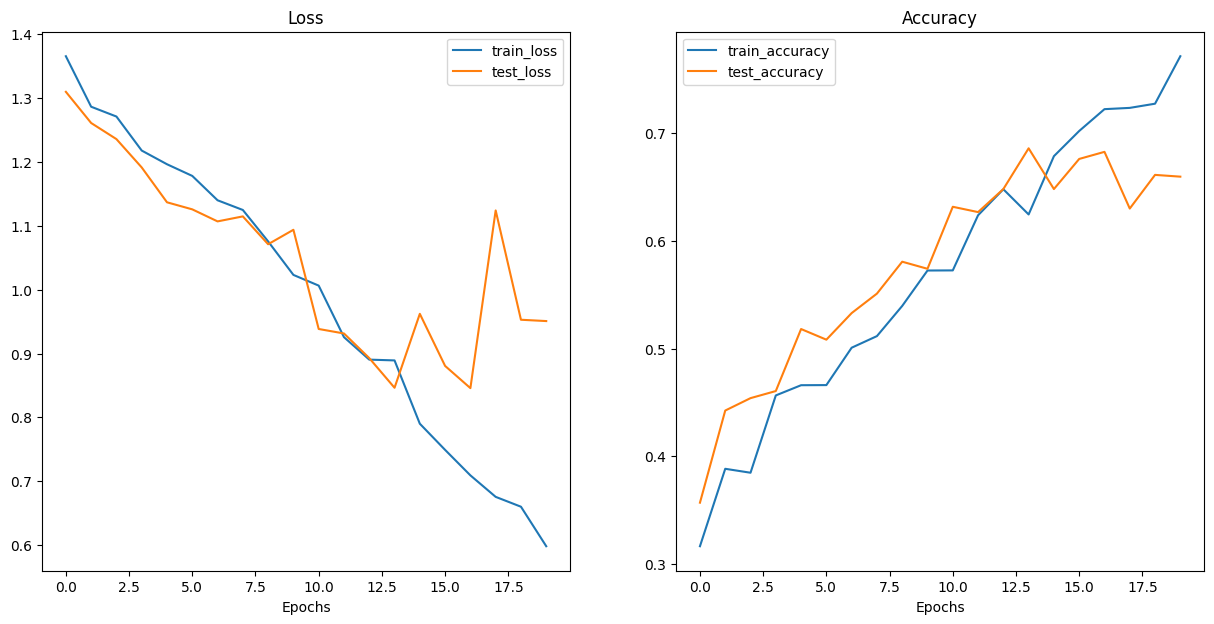

In [11]:
from helper_functions import plot_loss_curves
plot_loss_curves(results)

In [12]:
from pathlib import Path
Model_Path=Path("models")
Model_Path.mkdir(parents=True,exist_ok=True)
Model_Name="modelv0.pth"
Model_Save_Path=Model_Path/Model_Name
print(f"Saving model to { Model_Save_Path}")
torch.save(obj=model_0.state_dict(),f=Model_Save_Path)

Saving model to models/modelv0.pth


In [13]:
!pip install torchinfo

In [14]:
from torchinfo import summary
summary(model=model_0,
        input_size=(32,3,128,128),
        col_names=["input_size","output_size","num_params","trainable"],
        col_width=20,
        row_settings=['var_names']
        )

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
CustomCNN (CustomCNN)                    [32, 3, 128, 128]    [32, 4]              --                   True
├─Conv2d (conv1)                         [32, 3, 128, 128]    [32, 32, 128, 128]   896                  True
├─ReLU (relu)                            [32, 32, 128, 128]   [32, 32, 128, 128]   --                   --
├─MaxPool2d (pool)                       [32, 32, 128, 128]   [32, 32, 64, 64]     --                   --
├─Conv2d (conv2)                         [32, 32, 64, 64]     [32, 64, 64, 64]     18,496               True
├─ReLU (relu)                            [32, 64, 64, 64]     [32, 64, 64, 64]     --                   --
├─MaxPool2d (pool)                       [32, 64, 64, 64]     [32, 64, 32, 32]     --                   --
├─Conv2d (conv3)                         [32, 64, 32, 32]     [32, 128, 32, 32]    73,856               True
├─ReLU (relu)         